In [1]:
import pandas as pd
import tqdm
import numpy as np
import os
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('train_sessions.csv')
test = pd.read_csv('test_sessions.csv')

# I want to read in full
pd.set_option('display.max_columns', 100)
train.head()

,session_id,site1,time1,site2,time2,site3,time3,site4,time4,site5,time5,site6,time6,site7,time7,site8,time8,site9,time9,site10,time10,target
0,1,718,2014-02-20 10:02:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,2,890,2014-02-22 11:19:50,941.0,2014-02-22 11:19:50,3847.0,2014-02-22 11:19:51,941.0,2014-02-22 11:19:51,942.0,2014-02-22 11:19:51,3846.0,2014-02-22 11:19:51,3847.0,2014-02-22 11:19:52,3846.0,2014-02-22 11:19:52,1516.0,2014-02-22 11:20:15,1518.0,2014-02-22 11:20:16,0
2,3,14769,2013-12-16 16:40:17,39.0,2013-12-16 16:40:18,14768.0,2013-12-16 16:40:19,14769.0,2013-12-16 16:40:19,37.0,2013-12-16 16:40:19,39.0,2013-12-16 16:40:19,14768.0,2013-12-16 16:40:20,14768.0,2013-12-16 16:40:21,14768.0,2013-12-16 16:40:22,14768.0,2013-12-16 16:40:24,0
3,4,782,2014-03-28 10:52:12,782.0,2014-03-28 10:52:42,782.0,2014-03-28 10:53:12,782.0,2014-03-28 10:53:42,782.0,2014-03-28 10:54:12,782.0,2014-03-28 10:54:42,782.0,2014-03-28 10:55:12,782.0,2014-03-28 10:55:42,782.0,2014-03-28 10:56:12,782.0,2014-03-28 10:56:42,0
4,5,22,2014-02-28 10:53:05,177.0,2014-02-28 10:55:22,175.0,2014-02-28 10:55:22,178.0,2014-02-28 10:55:23,177.0,2014-02-28 10:55:23,178.0,2014-02-28 10:55:59,175.0,2014-02-28 10:55:59,177.0,2014-02-28 10:55:59,177.0,2014-02-28 10:57:06,178.0,2014-02-28 10:57:11,0


In [3]:
# site_i – are ids of sites in this session. The mapping is given with a pickled dictionary site_dic.pkl
# time_j – are timestamps of attending the corresponding site
# target – whether this session belongs to Alice

# Let's check the dictionary
import pickle
with open('site_dic.pkl', 'rb') as f:
    site_dict = pickle.load(f)
site_dict

{'www.abmecatronique.com': 25075,
 'groups.live.com': 13997,
 'majeureliguefootball.wordpress.com': 42436,
 'cdt46.media.tourinsoft.eu': 30911,
 'www.hdwallpapers.eu': 8104,
 'img378.imageshack.us': 37491,
 'ecologie.nature.free.fr': 5462,
 'www.ibcn.intec.ugent.be': 35425,
 'kissanime.com': 30151,
 'www.carolineconduiteformation.com': 38268,
 'images.mystockphoto.com': 43641,
 'journalph.csphares.qc.ca': 36959,
 'www.uqo.ca': 40935,
 'd8d94e0wul1nb.cloudfront.net': 12346,
 'openapi.elong.com': 31023,
 'flamenco-o.blogspot.com': 31114,
 'www.pages-annuaire.net': 28165,
 'smart2000.pagesperso-orange.fr': 31877,
 'fast.forbes.com': 31070,
 'i1-js-14-3-01-10077-536503633-i.init.cedexis-radar.net': 12938,
 'i1-js-14-3-01-11074-716595896-i.init.cedexis-radar.net': 42002,
 'www.pacajob.com': 5671,
 'mathaa.epfl.ch': 32074,
 'cbv.sfr.bench.cedexis.com': 7104,
 'fbcdn-sphotos-b-a.akamaihd.net': 1939,
 'www.mystere-tv.com': 6708,
 'www.mon-ip.fr': 43589,
 'www.aqua-passion.com': 45241,
 'reunio

## Data Wrangling

In [4]:
# Shape of our data
print("Our train data has {} rows and {} columns".format(train.shape[0], train.shape[1]))

Our train data has 253561 rows and 22 columns


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253561 entries, 0 to 253560
Data columns (total 22 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   session_id  253561 non-null  int64  
 1   site1       253561 non-null  int64  
 2   time1       253561 non-null  object 
 3   site2       250098 non-null  float64
 4   time2       250098 non-null  object 
 5   site3       246919 non-null  float64
 6   time3       246919 non-null  object 
 7   site4       244321 non-null  float64
 8   time4       244321 non-null  object 
 9   site5       241829 non-null  float64
 10  time5       241829 non-null  object 
 11  site6       239495 non-null  float64
 12  time6       239495 non-null  object 
 13  site7       237297 non-null  float64
 14  time7       237297 non-null  object 
 15  site8       235224 non-null  float64
 16  time8       235224 non-null  object 
 17  site9       233084 non-null  float64
 18  time9       233084 non-null  object 
 19  si

In [6]:
# Missing values
train.isnull().sum()

session_id        0
site1             0
time1             0
site2          3463
time2          3463
site3          6642
time3          6642
site4          9240
time4          9240
site5         11732
time5         11732
site6         14066
time6         14066
site7         16264
time7         16264
site8         18337
time8         18337
site9         20477
time9         20477
site10        22509
time10        22509
target            0
dtype: int64

In [7]:
# Remove missing values those with over 50% missing values
for col in train.columns:
    if train[col].isnull().sum() / train.shape[0] > 0.5:
        train.drop(col, axis=1, inplace=True)

# Drop columns with only one unique value
for col in train.columns:
    if train[col].nunique() == 1:
        train.drop(col, axis=1, inplace=True)

In [8]:
# Impute missing values
train.fillna(-1, inplace=True)

## Data Visualization

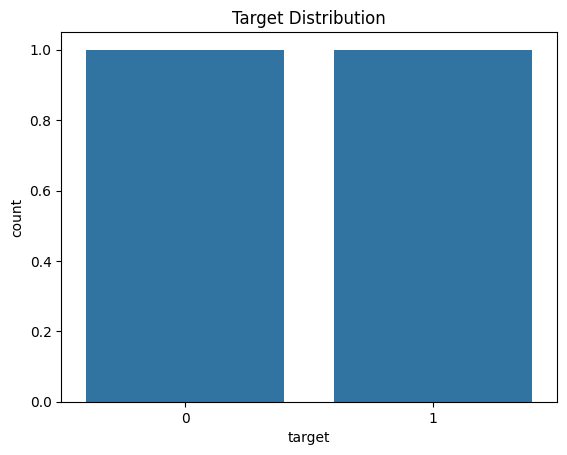

In [9]:
# Check the distribution of the target
sns.countplot(train['target'].value_counts(normalize=True))
plt.title('Target Distribution')
plt.show()

#### Insight: the target is balanced, so we can use accuracy as the evaluation metric.

In [10]:
# Describe the data
train_description = train.describe()
train_description.style.set_properties(**{'background-color': 'iris',})

,session_id,site1,site2,site3,site4,site5,site6,site7,site8,site9,site10,target
count,253561.000000,253561.000000,253561.000000,253561.000000,253561.000000,253561.000000,253561.000000,253561.000000,253561.000000,253561.000000,253561.000000,253561.000000
mean,126781.000000,3243.550144,3227.694531,3217.413999,3203.902883,3188.663895,3166.291539,3177.684257,3182.023627,3160.642090,3153.116047,0.009059
std,73196.900140,7247.006212,7267.345605,7270.121498,7262.484625,7241.171054,7213.736426,7241.278690,7252.770599,7224.077821,7219.597018,0.094747
min,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,63391.000000,53.000000,52.000000,50.000000,39.000000,39.000000,37.000000,37.000000,35.000000,35.000000,33.000000,0.000000
50%,126781.000000,677.000000,660.000000,616.000000,616.000000,607.000000,570.000000,570.000000,570.000000,570.000000,570.000000,0.000000
75%,190171.000000,1980.000000,1931.000000,1922.000000,1919.000000,1919.000000,1798.000000,1800.000000,1915.000000,1648.000000,1590.000000,0.000000
max,253561.000000,41601.000000,41600.000000,41599.000000,41599.000000,41599.000000,41600.000000,41600.000000,41601.000000,41601.000000,41601.000000,1.000000


## Feature Engineering

In [11]:
train.head()

,session_id,site1,time1,site2,time2,site3,time3,site4,time4,site5,time5,site6,time6,site7,time7,site8,time8,site9,time9,site10,time10,target
0,1,718,2014-02-20 10:02:45,-1.0,-1,-1.0,-1,-1.0,-1,-1.0,-1,-1.0,-1,-1.0,-1,-1.0,-1,-1.0,-1,-1.0,-1,0
1,2,890,2014-02-22 11:19:50,941.0,2014-02-22 11:19:50,3847.0,2014-02-22 11:19:51,941.0,2014-02-22 11:19:51,942.0,2014-02-22 11:19:51,3846.0,2014-02-22 11:19:51,3847.0,2014-02-22 11:19:52,3846.0,2014-02-22 11:19:52,1516.0,2014-02-22 11:20:15,1518.0,2014-02-22 11:20:16,0
2,3,14769,2013-12-16 16:40:17,39.0,2013-12-16 16:40:18,14768.0,2013-12-16 16:40:19,14769.0,2013-12-16 16:40:19,37.0,2013-12-16 16:40:19,39.0,2013-12-16 16:40:19,14768.0,2013-12-16 16:40:20,14768.0,2013-12-16 16:40:21,14768.0,2013-12-16 16:40:22,14768.0,2013-12-16 16:40:24,0
3,4,782,2014-03-28 10:52:12,782.0,2014-03-28 10:52:42,782.0,2014-03-28 10:53:12,782.0,2014-03-28 10:53:42,782.0,2014-03-28 10:54:12,782.0,2014-03-28 10:54:42,782.0,2014-03-28 10:55:12,782.0,2014-03-28 10:55:42,782.0,2014-03-28 10:56:12,782.0,2014-03-28 10:56:42,0
4,5,22,2014-02-28 10:53:05,177.0,2014-02-28 10:55:22,175.0,2014-02-28 10:55:22,178.0,2014-02-28 10:55:23,177.0,2014-02-28 10:55:23,178.0,2014-02-28 10:55:59,175.0,2014-02-28 10:55:59,177.0,2014-02-28 10:55:59,177.0,2014-02-28 10:57:06,178.0,2014-02-28 10:57:11,0


In [12]:
# Since we have a time series data, we can extract more features from the time_j column
# the columns are labelled time1 to time10

# Convert the time_j columns to datetime    

for i in range(1, 11):
    train['time' + str(i)] = pd.to_datetime(train['time' + str(i)])

# Extract more features from the time_j columns
for i in range(1, 11):
    train['hour' + str(i)] = train['time' + str(i)].dt.hour
    train['day_of_week' + str(i)] = train['time' + str(i)].dt.dayofweek
    train['day' + str(i)] = train['time' + str(i)].dt.day
    train['month' + str(i)] = train['time' + str(i)].dt.month
    train['year' + str(i)] = train['time' + str(i)].dt.year

# Drop the time_j columns
train.drop(['time' + str(i) for i in range(1, 11)], axis=1, inplace=True)

train.head()

,session_id,site1,site2,site3,site4,site5,site6,site7,site8,site9,site10,target,hour1,day_of_week1,day1,month1,year1,hour2,day_of_week2,day2,month2,year2,hour3,day_of_week3,day3,month3,year3,hour4,day_of_week4,day4,month4,year4,hour5,day_of_week5,day5,month5,year5,hour6,day_of_week6,day6,month6,year6,hour7,day_of_week7,day7,month7,year7,hour8,day_of_week8,day8,month8,year8,hour9,day_of_week9,day9,month9,year9,hour10,day_of_week10,day10,month10,year10
0,1,718,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,10,3,20,2,2014,23,2,31,12,1969,23,2,31,12,1969,23,2,31,12,1969,23,2,31,12,1969,23,2,31,12,1969,23,2,31,12,1969,23,2,31,12,1969,23,2,31,12,1969,23,2,31,12,1969
1,2,890,941.0,3847.0,941.0,942.0,3846.0,3847.0,3846.0,1516.0,1518.0,0,11,5,22,2,2014,11,5,22,2,2014,11,5,22,2,2014,11,5,22,2,2014,11,5,22,2,2014,11,5,22,2,2014,11,5,22,2,2014,11,5,22,2,2014,11,5,22,2,2014,11,5,22,2,2014
2,3,14769,39.0,14768.0,14769.0,37.0,39.0,14768.0,14768.0,14768.0,14768.0,0,16,0,16,12,2013,16,0,16,12,2013,16,0,16,12,2013,16,0,16,12,2013,16,0,16,12,2013,16,0,16,12,2013,16,0,16,12,2013,16,0,16,12,2013,16,0,16,12,2013,16,0,16,12,2013
3,4,782,782.0,782.0,782.0,782.0,782.0,782.0,782.0,782.0,782.0,0,10,4,28,3,2014,10,4,28,3,2014,10,4,28,3,2014,10,4,28,3,2014,10,4,28,3,2014,10,4,28,3,2014,10,4,28,3,2014,10,4,28,3,2014,10,4,28,3,2014,10,4,28,3,2014
4,5,22,177.0,175.0,178.0,177.0,178.0,175.0,177.0,177.0,178.0,0,10,4,28,2,2014,10,4,28,2,2014,10,4,28,2,2014,10,4,28,2,2014,10,4,28,2,2014,10,4,28,2,2014,10,4,28,2,2014,10,4,28,2,2014,10,4,28,2,2014,10,4,28,2,2014


In [ ]:
# Let's check the distribution of the new features
#fig, ax = plt.subplots(5, 2, figsize=(20, 20))
#for i in range(1, 11):
    #sns.countplot(train['hour' + str(i)], ax=ax[(i-1)//2, (i-1)%2])
    #ax[(i-1)//2, (i-1)%2].set_title('hour' + str(i))

#plt.show()

## Model building

The accuracy of the model is:  0.9945773273125235


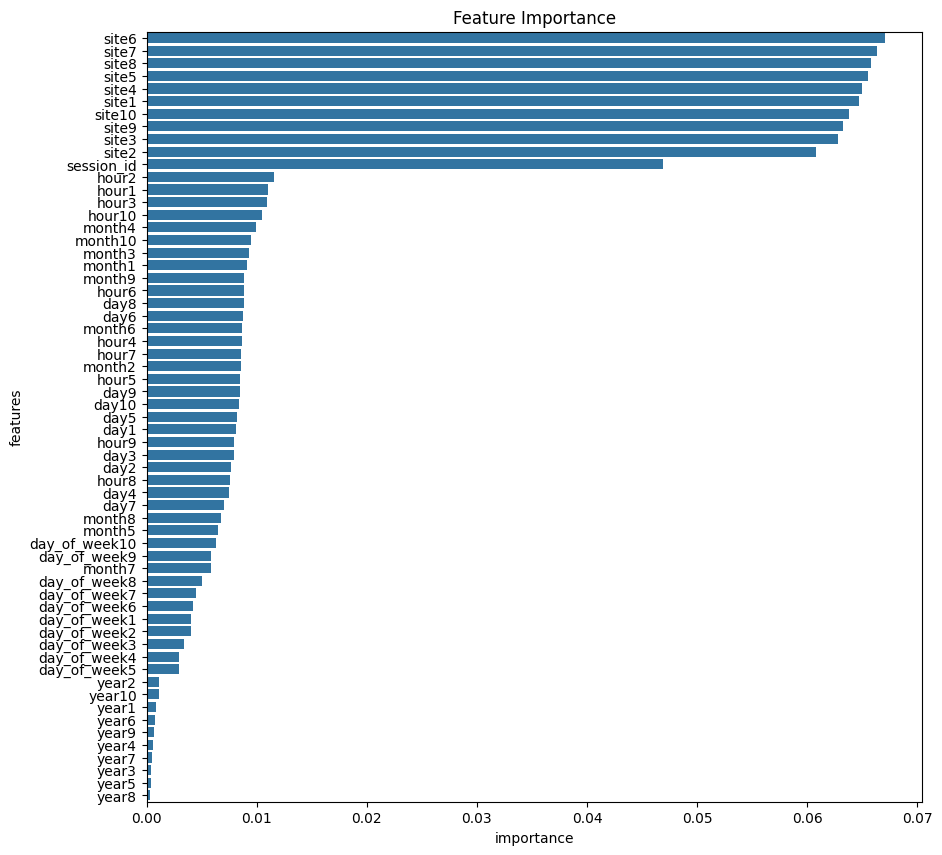

In [13]:
# Build our model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X = train.drop('target', axis=1)
y = train['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Check the accuracy of the model
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("The accuracy of the model is: ", accuracy)

# Let's check the feature importance
feature_importance = model.feature_importances_
features = X.columns
feature_importance_df = pd.DataFrame({'features': features, 'importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

plt.figure(figsize=(10, 10))
sns.barplot(x='importance', y='features', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()

In [14]:
# The classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     50255
           1       0.87      0.47      0.61       458

    accuracy                           0.99     50713
   macro avg       0.93      0.73      0.80     50713
weighted avg       0.99      0.99      0.99     50713

[[50223    32]
 [  243   215]]


In [15]:
# Assuming y_test and y_pred are defined
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Style the classification report
styled_report = report_df.style.set_properties(**{'background-color': 'lightblue'})

# Display the styled report
styled_report

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_df = pd.DataFrame(conf_matrix, index=['0', '1'], columns=['Predicted 0', 'Predicted 1'])

# Style the confusion matrix
styled_conf_matrix = conf_matrix_df.style.set_properties(**{'background-color': 'lightgreen'})

# Display the styled confusion matrix
styled_conf_matrix

,Predicted 0,Predicted 1
0,50223,32
1,243,215


In [16]:
# To improve the model's performance on class 1, we can use SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

model = RandomForestClassifier(n_estimators=100, random_state=42)

model.fit(X_smote, y_smote)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("The accuracy of the model is: ", accuracy)

# The classification report and confusion matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

The accuracy of the model is:  0.9918364127541262
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     50255
           1       0.54      0.67      0.60       458

    accuracy                           0.99     50713
   macro avg       0.77      0.83      0.80     50713
weighted avg       0.99      0.99      0.99     50713

[[49993   262]
 [  152   306]]


In [17]:
styled_report = report_df.style.set_properties(**{'background-color': 'lightblue'})
styled_conf_matrix = conf_matrix_df.style.set_properties(**{'background-color': 'lightgreen'})

styled_report

,precision,recall,f1-score,support
0,0.995185,0.999363,0.997270,50255.000000
1,0.870445,0.469432,0.609929,458.000000
accuracy,0.994577,0.994577,0.994577,0.994577
macro avg,0.932815,0.734398,0.803599,50713.000000
weighted avg,0.994058,0.994577,0.993772,50713.000000


In [18]:
import xgboost
from xgboost import XGBClassifier

model = XGBClassifier(n_estimators=100, random_state=42)
model.fit(X_smote, y_smote)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("The accuracy of the model is: ", accuracy)

# The classification report and confusion matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

The accuracy of the model is:  0.983633387888707
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     50255
           1       0.34      0.85      0.48       458

    accuracy                           0.98     50713
   macro avg       0.67      0.92      0.74     50713
weighted avg       0.99      0.98      0.99     50713

[[49495   760]
 [   70   388]]


## Preprocessing Test Set

In [19]:
# Preprocessing the test data
test = pd.read_csv('test_sessions.csv')

# Convert the time_j columns to datetime
for i in range(1, 11):
    test['time' + str(i)] = pd.to_datetime(test['time' + str(i)])

# Extract more features from the time_j columns
for i in range(1, 11):
    test['hour' + str(i)] = test['time' + str(i)].dt.hour
    test['day_of_week' + str(i)] = test['time' + str(i)].dt.dayofweek
    test['day' + str(i)] = test['time' + str(i)].dt.day
    test['month' + str(i)] = test['time' + str(i)].dt.month
    test['year' + str(i)] = test['time' + str(i)].dt.year

# Drop the time_j columns
test.drop(['time' + str(i) for i in range(1, 11)], axis=1, inplace=True)

# Impute missing values
test.fillna(-1, inplace=True)

# Feature scaling
test = scaler.transform(test)

# Make predictions
predictions = model.predict(test)

In [21]:
# Submission #2
sample = pd.read_csv('sample_submission.csv')

sample.head()

,session_id,target
0,1,0.948255
1,2,0.682483
2,3,0.502855
3,4,0.345556
4,5,0.889428


In [23]:
submission = pd.DataFrame({
    'session_id': sample['session_id'],  # Use the IDs from the sample submission
    'target': predictions      # Use your predictions
})

# Step 3: Save the Submission File
submission.to_csv('submission.csv', index=False)